In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score 
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression , Ridge, Lasso, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, datasets
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf
from glm.glm import GLM
from glm.families import Gaussian
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import re
from knn import *
from rfpimp import *

In [2]:
data = pd.read_csv('model_data.csv').drop(columns='Unnamed: 0')
data.dropna(inplace = True)

X = np.array(data.drop(columns='Cover'))
y = np.array(data['Cover'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
y_predict = rf.predict_proba(X_test)[:, 1]

In [9]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    
    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)

    return tprs, fprs, thresholds.tolist()

Text(0.5, 1.0, 'ROC plot of fake data')

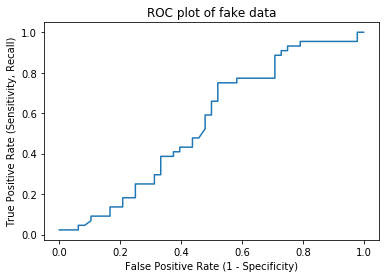

In [12]:
tpr, fpr, thres = roc_curve(y_predict, y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")

In [36]:
predicted_positive = y_predict > .80
true_positives = np.sum(predicted_positive * y_test)
accuracy = true_positives/ float(sum(predicted_positive))


In [37]:
accuracy # pretty bad predictive model

0.38461538461538464

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_prediction = model.predict_proba(X_test)[:, 1]

/home/richard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'ROC plot of fake data')

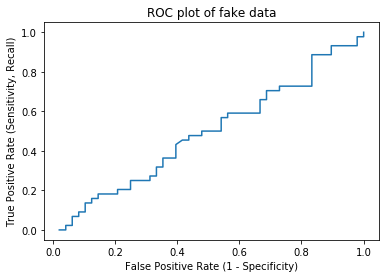

In [43]:
tpr, fpr, thres = roc_curve(y_prediction, y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")

In [44]:
# a lot worse than random forest

In [ ]:
tpr, fpr, thres = roc_curve(y_predict, y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")